In [1]:
from datasets import load_dataset
from utils.str_utils import Utils
from llm.EngineLLM import LLMEngine
from visualization.drawer import Drawer
from ocr.TesseractOCR import TesseractOCR

In [10]:
dataset = load_dataset("ayoub999/dataset_for_orange_factures")
example = dataset['train'][4]['image']
ocr_engine = TesseractOCR()
words, boxes = ocr_engine.ocr(example)

In [11]:
llm = LLMEngine("llama3 70b")
response = Utils.query_to_dict(llm.ocr_to_llm(words))

In [12]:
data2boxes = Drawer.data2boxes(response, words, boxes)
boxed_image = Drawer.box_all(example, data2boxes)

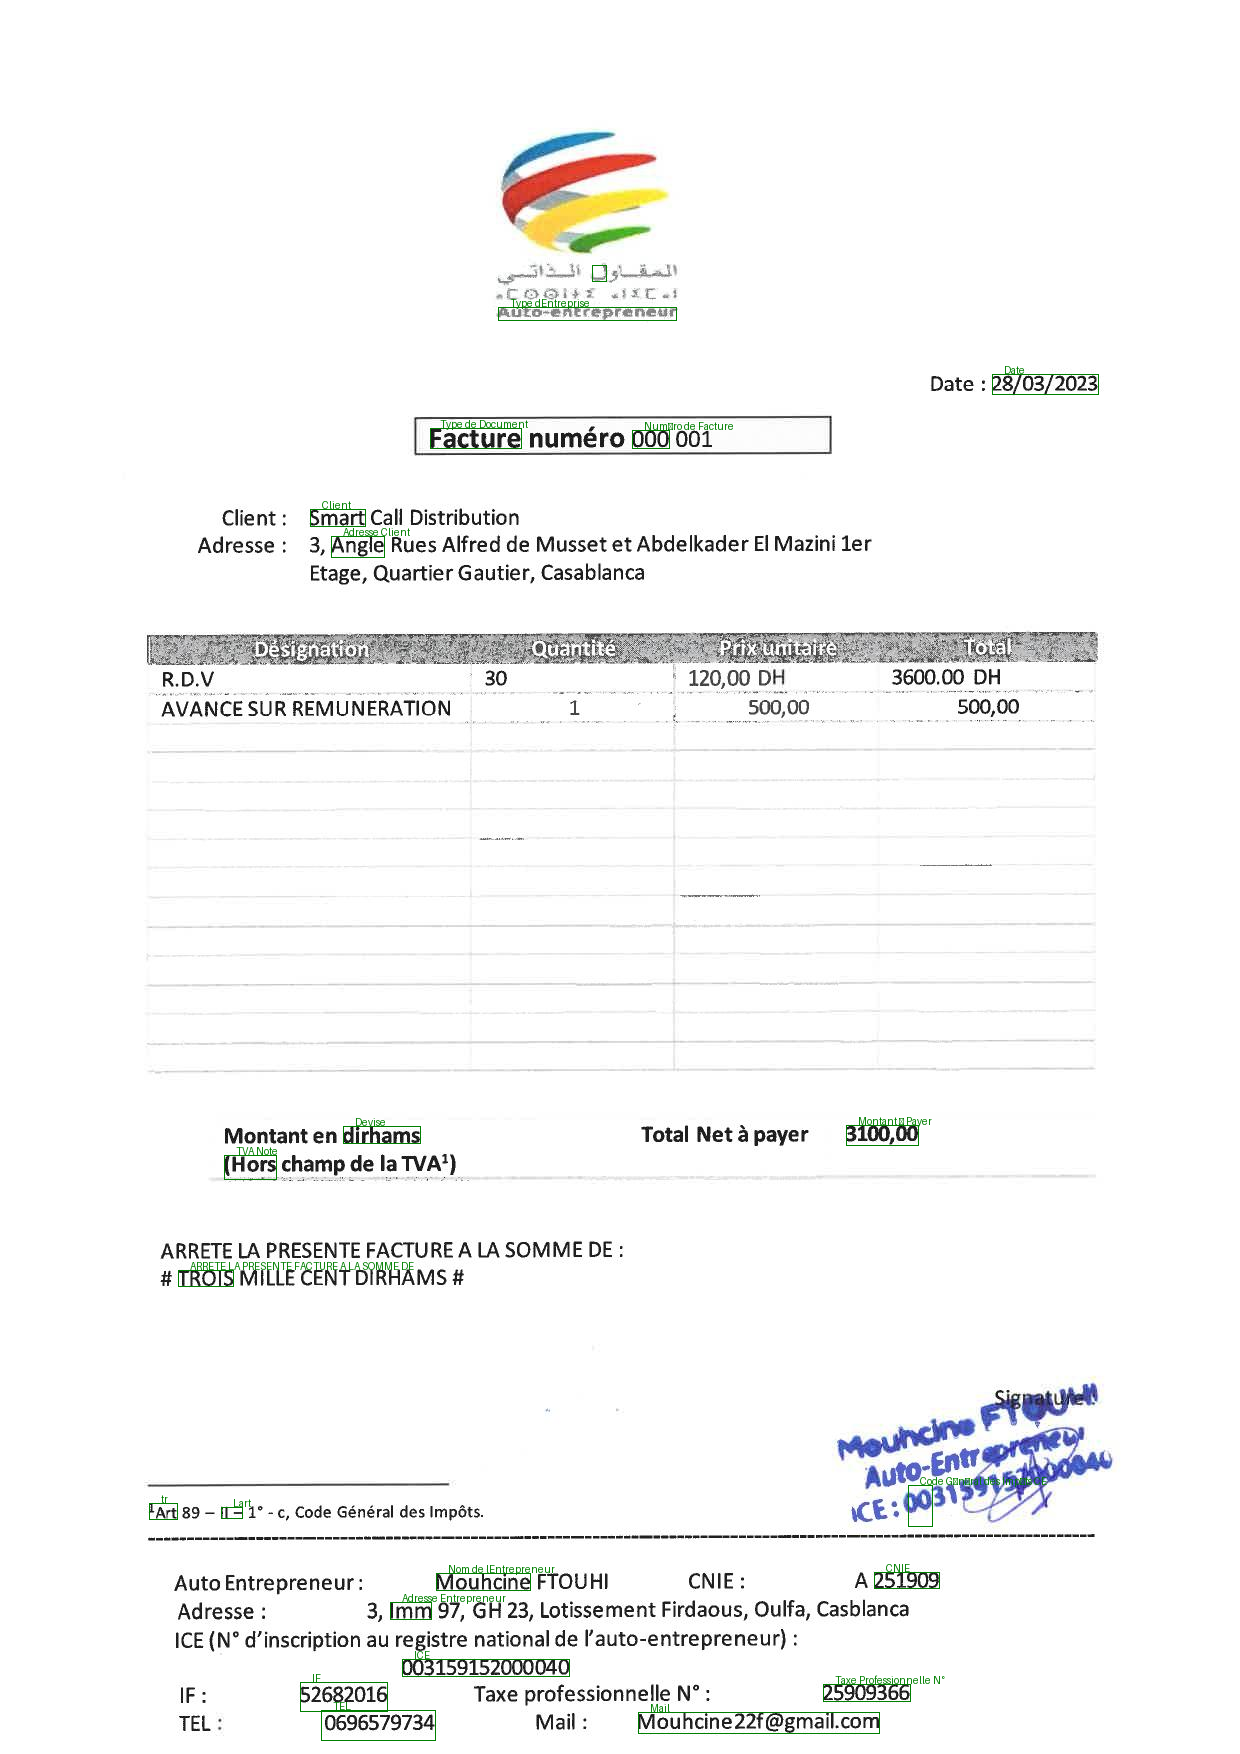

In [13]:
boxed_image